# Learnt From

In [1]:
## https://youtu.be/0P7QnIQDBJY?list=PLuueT5PsexC99xgXJh62KO-J1wMt1kQ9j

# Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# line graph

In [2]:
gas=pd.read_csv('gas_prices.csv')
gas.head()

,Year,Australia,Canada,France,Germany,Italy,Japan,Mexico,South Korea,UK,USA
0,1990,NaN,1.87,3.63,2.65,4.59,3.16,1.00,2.05,2.82,1.16
1,1991,1.96,1.92,3.45,2.90,4.50,3.46,1.30,2.49,3.01,1.14
2,1992,1.89,1.73,3.56,3.27,4.53,3.58,1.50,2.65,3.06,1.13
3,1993,1.73,1.57,3.41,3.07,3.68,4.16,1.56,2.88,2.84,1.11
4,1994,1.84,1.45,3.59,3.52,3.70,4.36,1.48,2.87,2.99,1.11


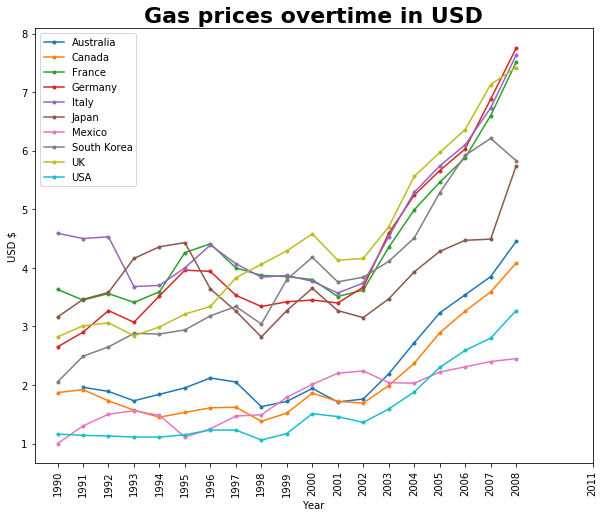

In [3]:
plt.figure(figsize=(10,8))
plt.title('Gas prices overtime in USD',
         fontdict={'fontweight':'bold','fontsize':22})
'''plt.plot(gas.Year,gas.USA,'g.-',label='USA')
plt.plot(gas['Year'],gas.Canada,'b.-',label='Canada')
plt.plot(gas['Year'],gas['South Korea'],'r.-',label='South Korea')
plt.plot(gas.Year,gas.Australia,'y.-')'''
for country in gas.columns:
    if country!='Year':
        plt.plot(gas.Year,gas[country],label=country,marker='.')
plt.xticks(gas.Year.tolist()+[2011],rotation='vertical')
plt.legend()
plt.xlabel('Year')
plt.ylabel('USD $')
plt.savefig('gas_price_fig.png',dpi=300)
plt.show()

# Load Fifa Description

In [4]:
fifa=pd.read_csv('fifa_data.csv')
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


# hoistogram

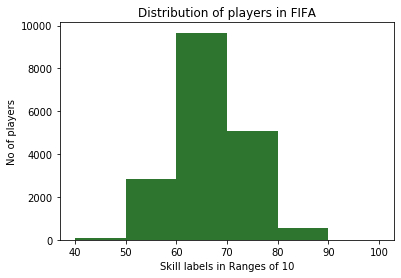

In [5]:
## instead of ploting wrt all Overall points we use bins(range plotting)
## 1st bin all player Overall between 0 to 10
##2nd bin all p''''''''''''''''''''''0 to 20
## bins--> intervals
bins=[40,50,60,70,80,90,100]
plt.hist(fifa.Overall,bins=bins,color='#2E7530') ### use google color picker
plt.xticks(bins)
plt.ylabel('No of players')
plt.xlabel('Skill labels in Ranges of 10')
plt.title('Distribution of players in FIFA')
plt.show()

# Pi charts

In [6]:
## loc--> locate
left=fifa.loc[fifa['Preferred Foot']=='Left'].count()[0]
right=fifa.loc[fifa['Preferred Foot']=='Right'].count()[0]

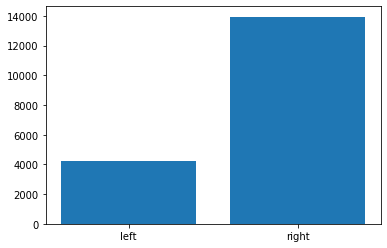

In [7]:
##bar
plt.bar(['left','right'],[left,right])
plt.show()

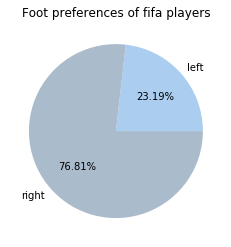

In [8]:
labels=['left','right']
colors=['#abcdef','#aabbcc']
plt.pie([left,right],  ####need to pass a list
        labels=labels,
        colors=colors,
       autopct='%.2f%%' ### need extra % to show a %
       )
plt.title('Foot preferences of fifa players')
plt.show()

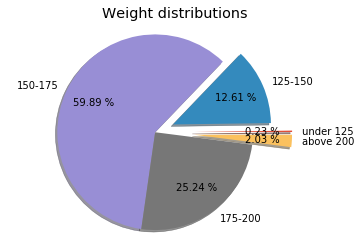

In [9]:
## if weight string then strip out 'lbs' and make float
## else float of the value
fifa.Weight=[float(x.strip('lbs')) if type(x)==str else float(x) for x in fifa.Weight]

light=fifa.loc[fifa.Weight<125].count()[0]# oney one sufficient so '0'
light_medium=fifa.loc[(fifa.Weight>=125)&(fifa.Weight<150)].count()[0]
medium=fifa.loc[(fifa.Weight>=150)&(fifa.Weight<175)].count()[0]
medium_heavy=fifa.loc[(fifa.Weight>=175)&(fifa.Weight<200)].count()[0]
heavy=fifa.loc[fifa.Weight>=200].count()[0]

weights=[light,light_medium,medium,medium_heavy,heavy]
labels=['under 125','125-150','150-175','175-200','above 200']
explode=[0.4,0.2,0,0,0.4] ## also () allowed

plt.style.use('ggplot')
plt.pie(weights,labels=labels,autopct='%.2f %%',
       pctdistance=.7, ## from center,inside pie 0 to 1
        explode=explode, ## seperates
        shadow=True
       )
plt.axis('equal') ## ensures circle
plt.title('Weight distributions')

plt.show()

# BOX

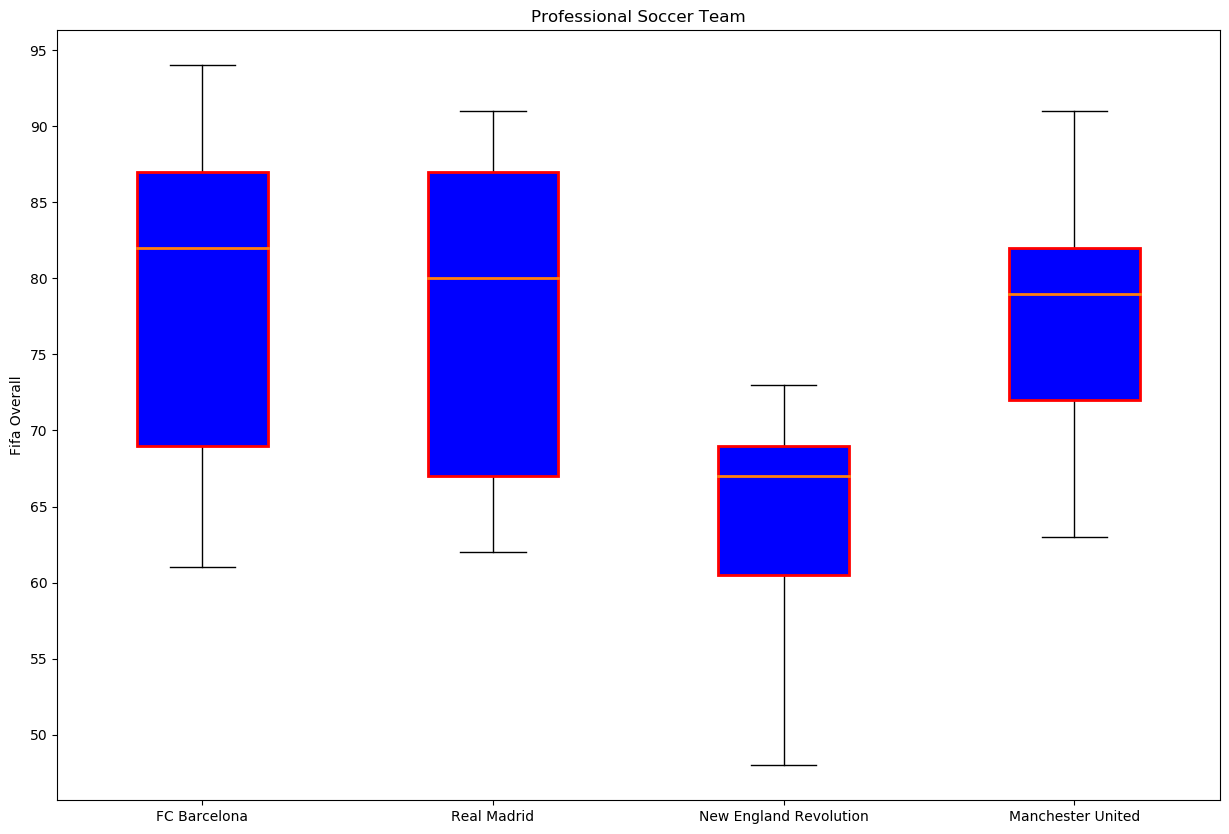

In [10]:
plt.style.use('default')

barcelona=fifa.loc[fifa.Club=='FC Barcelona']['Overall']
madrid=fifa.loc[fifa.Club=='Real Madrid']['Overall']
revs=fifa.loc[fifa.Club=='New England Revolution']['Overall']
mcu=fifa.loc[fifa.Club=='Manchester United']['Overall']

clubs=[barcelona,madrid,revs,mcu]
labels=['FC Barcelona','Real Madrid','New England Revolution','Manchester United']

plt.figure(figsize=(15,10))
plt.title('Professional Soccer Team')
plt.ylabel('Fifa Overall')
plt.yticks(np.arange(0,100,5))

boxes=plt.boxplot(clubs,labels=labels,patch_artist=True,medianprops={'linewidth':2})
                           #######"patch_artist" enables box filling mode
for box in boxes['boxes']:
    ### set edge color
    box.set(color='r',linewidth=2)
    ## fill color
    box.set(facecolor='b') ## when patch_artist=True
    
plt.show()